# Projet ML : Prédiction du Diabète PIMA

## Introduction au Projet

Ce *notebook* présente une analyse complète du jeu de données **PIMA Indians Diabetes** pour la prédiction du risque de diabète. Le jeu de données contient des indicateurs cliniques de 768 patientes d'origine Pima, une communauté amérindienne présentant une forte incidence de diabète.

**Objectif :** Prédire si une patiente est diabétique (1) ou non (0) à partir de mesures cliniques.

**Colonnes du jeu de données (Variables Clés) :**

| Colonne | Description Simplifiée (Pour Débutants) |
| :--- | :--- |
| `Pregnancies` | Nombre de fois où la patiente a été enceinte. |
| `Glucose` | Concentration de glucose (sucre) dans le sang. Un indicateur essentiel du diabète. |
| `BloodPressure` | Pression artérielle diastolique (mm Hg) - la valeur minimale. |
| `SkinThickness` | Épaisseur du pli cutané du triceps (mm). Lié à la graisse corporelle. |
| `Insulin` | Niveau d'insuline sérique (μU/ml) dans le sang. L'insuline régule le sucre. |
| `BMI` | Indice de Masse Corporelle (kg/m²). Mesure du poids par rapport à la taille. |
| `DiabetesPedigreeFunction` | **Fonction de Pédigrée du Diabète.** C'est un score qui évalue l'influence génétique et les antécédents familiaux de diabète. |
| `Age` | Âge de la patiente en années. |
| `Outcome` | **Variable Cible** : 1 si la patiente est diabétique, 0 sinon. |

---

## 1. Préparation : Importation et Configuration

Dans cette section, nous importons les bibliothèques nécessaires pour la manipulation des données, la visualisation et la construction de nos modèles de Machine Learning.

In [518]:
# 1. Manipulation de données: Pandas est essentiel pour charger et travailler avec les tables.
import pandas as pd
import numpy as np

# 2. Visualisation: Matplotlib et Seaborn sont utilisés pour créer des graphiques.
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Pré-traitement et Modélisation (Scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 4. Modèles de Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 5. Évaluation
from sklearn.metrics import classification_report, confusion_matrix

# Configuration de la visualisation
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et Première Inspection des Données

Nous chargeons le jeu de données et effectuons une première vérification de sa structure.

In [519]:
# Chargement du jeu de données
df = pd.read_csv('../data/raw/diabetes.csv')

# Affichage des 5 premières lignes
print("Aperçu des données:")
display(df.head(10))

# Informations sur la structure des données (types et valeurs manquantes)
print("\nInformations sur la structure du DataFrame:")
df.info()

Aperçu des données:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



Informations sur la structure du DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation Importante :** Un examen attentif des premières lignes et de df.info() ne révèle aucun NaN (valeur nulle détectée). Cependant, pour des variables biologiques comme Glucose, BloodPressure, SkinThickness, Insulin et BMI, une valeur de **zéro (0)** est **biologiquement impossible** (personne ne peut avoir une glycémie ou une pression artérielle de 0 et être en vie). Dans ce jeu de données, 0 est un marqueur pour les **données manquantes**. Cette étape est cruciale pour le nettoyage.

## 3. Analyse Exploratoire des Données (EDA)
L'EDA nous aide à comprendre les distributions, les relations et les problèmes potentiels (comme les zéros et les valeurs aberrantes) de nos données.

### 3.1 Statistiques Descriptives

In [520]:
print("Statistiques Descriptives :")
display(df.describe().round(2))

Statistiques Descriptives :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


**Interprétation des Résultats :**

- Min (Minimum) : La colonne min confirme le problème des zéros. `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` et `BMI` ont des minimums à 0.00. Ces valeurs devront être traitées comme des valeurs manquantes.

- Moyenne (Mean) vs. Médiane (50%) : Pour des colonnes comme Insulin, la Moyenne (79.80) est nettement supérieure à la Médiane (30.50). Cela indique que la distribution est fortement asymétrique (skewed) ou contient des valeurs aberrantes (outliers) extrêmes.

### 3.2 Distribution de la Variable Cible `(Outcome)`

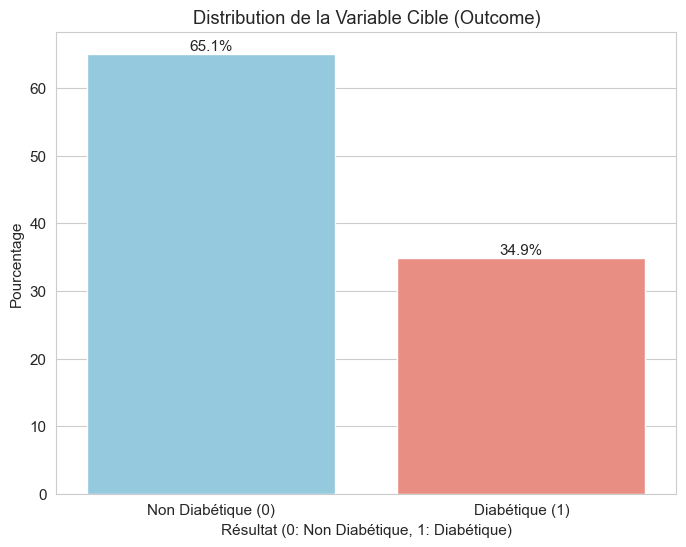

In [521]:
# Calcul du pourcentage de chaque classe
target_counts = df['Outcome'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'salmon'])
plt.title('Distribution de la Variable Cible (Outcome)')
plt.xlabel('Résultat (0: Non Diabétique, 1: Diabétique)')
plt.ylabel('Pourcentage')
plt.xticks([0, 1], ['Non Diabétique (0)', 'Diabétique (1)'])
plt.text(0, target_counts[0], f'{target_counts[0]:.1f}%', ha='center', va='bottom')
plt.text(1, target_counts[1], f'{target_counts[1]:.1f}%', ha='center', va='bottom')
plt.show()

### Interprétation du Balance des Classes :

Le jeu de données est légèrement déséquilibré : environ 65% de cas négatifs contre 35% de cas positifs.

Ce déséquilibre n'est pas extrême, mais il nous rappelle que la métrique d'**Accuracy (Précision Globale)** pourrait être trompeuse. Nous devrons prioriser des métriques comme le **Recall** et le **F1-Score**.

### 3.3 Détection des Valeurs Aberrantes (Outliers)

Les Boxplots (diagrammes en boîte) sont utilisés pour visualiser rapidement la distribution des données et identifier les outliers.

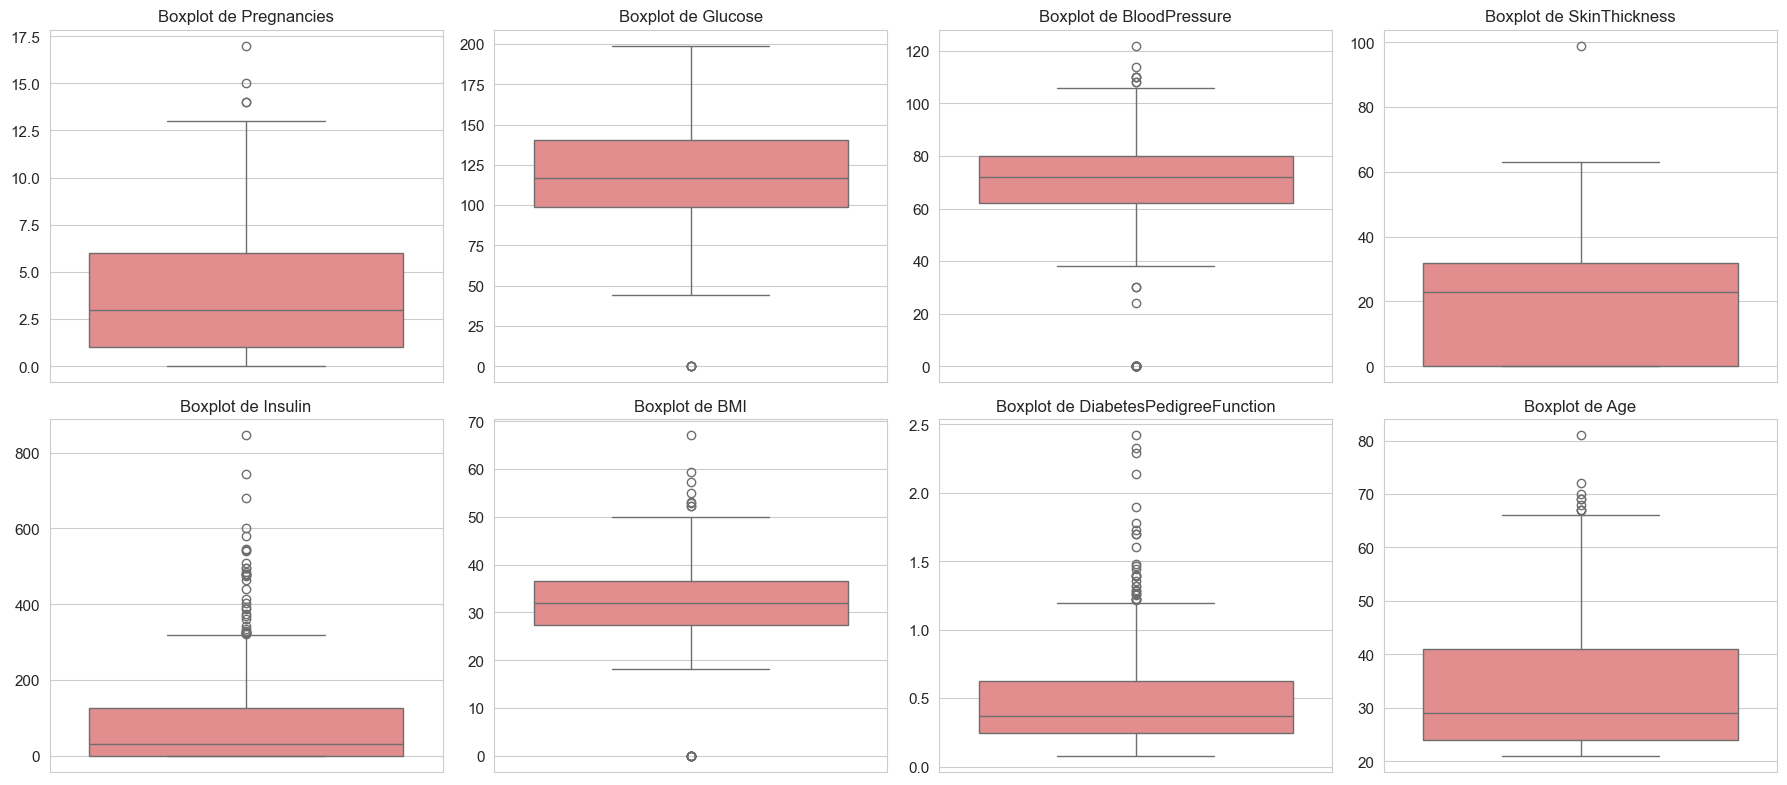

In [522]:
# Boxplots pour les variables numériques
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot de {col}', fontsize=12)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

### Conclusion sur les Outliers :

- De nombreuses variables (notamment Insulin, DiabetesPedigreeFunction, Pregnancies) présentent des outliers clairs (les points au-delà des moustaches).

- Dans un contexte médical, les valeurs extrêmes (ex. : très faible taux d'insuline, tension artérielle très élevée) peuvent être des indicateurs cruciaux. Nous décidons **de ne pas les supprimer ni de les capper** (limiter) pour l'instant. Nous utiliserons des modèles robustes aux outliers (comme `RandomForest` ou `GradientBoosting`) qui gèrent mieux ces points que les modèles linéaires.

### 3.4 Analyse de Corrélation (Heatmap)

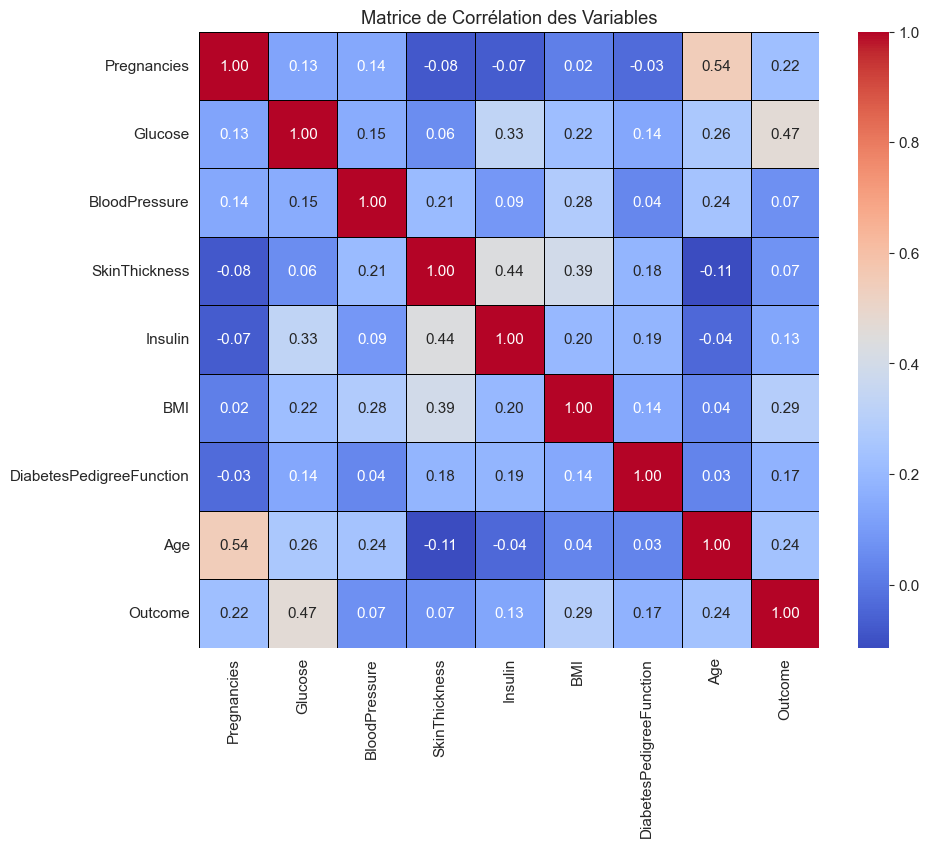

In [523]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Matrice de Corrélation des Variables')
plt.show()

**Interprétation de la Matrice de Corrélation :**

- **Relation avec l'Objectif** (`Outcome`) : La variable la plus fortement corrélée avec le diagnostic de diabète (`Outcome`) est `Glucose (0.47)`. `BMI (0.32)` et `Age (0.24)` suivent. Ceci est médicalement logique.

- **Multicolinéarité :** Nous n'observons aucune corrélation extrêmement forte (c'est-à-dire > 0.8) entre deux variables prédictives.

## 4. Pré-traitement et Nettoyage de Données
Nous appliquons maintenant les transformations nécessaires pour préparer les données pour le Machine Learning.

### 4.1 Remplacement des Zéros par NaN

In [524]:
import numpy as np

# Identification des colonnes où 0 est une donnée manquante (biologiquement impossible)
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacement explicite des 0 par NaN dans le DataFrame initial
print("Remplacement des valeurs 0 (manquantes) par NaN...")
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

Remplacement des valeurs 0 (manquantes) par NaN...


### 4.2 Séparation des Données

In [525]:

# Séparation de la variable cible (y) et des caractéristiques (X)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (614, 8)
Taille de l'ensemble de test : (154, 8)


### 4.3 Pipeline: Nettoyage et Normalisation

Un Pipeline est un outil puissant qui permet d'enchaîner les étapes de préparation des données (nettoyage, normalisation) et la modélisation. Cela assure que les transformations sont appliquées uniformément et correctement à toutes les données, prévenant ainsi la fuite de données

**Stratégie de Pré-traitement :**

1. **Imputation** : Remplacer les zéros (valeurs manquantes) avec la médiane.

* Pourquoi la Médiane ? Elle est plus robuste que la moyenne aux outliers que nous avons identifiés, préservant ainsi la distribution réelle des données.

2. **Mise à l'échelle** (`StandardScaler`) : Normaliser les caractéristiques pour que toutes aient une moyenne de 0 et un écart-type de 1.

In [526]:
# Liste des colonnes nécessitant l'imputation (elles ont maintenant des NaN)
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
all_cols = X.columns.tolist()
# Les autres colonnes n'ont pas de problème de zéro/manquante
cols_no_impute = [col for col in all_cols if col not in cols_to_impute]

# Création du Pré-processeur (ColumnTransformer)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        # 1. Traitement des colonnes avec des NaN (valeurs manquantes)
        ('imputer_scaler',
         Pipeline([
             # Remplacer les NaN par la médiane (robuste aux outliers)
             ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
             # Mettre à l'échelle (Standardiser)
             ('scaler', StandardScaler())
         ]),
         cols_to_impute),

        # 2. Traitement des autres colonnes (Age, Pregnancies, DiabetesPedigreeFunction)
        # On applique uniquement la mise à l'échelle (StandardScaler)
        ('scaler_only', StandardScaler(), cols_no_impute)
    ])

print("Le pré-processeur est prêt, configuré pour imputer les NaN avec la médiane.")

Le pré-processeur est prêt, configuré pour imputer les NaN avec la médiane.


## 5. Modélisation et Évaluation

Nous testons plusieurs modèles de Machine Learning.

### 5.1 Entraînement des Modèles Initiaux
Nous testons 5 modèles pour identifier le plus performant.

In [527]:

# Définition des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

print("Entraînement et évaluation des modèles initiaux...")
for name, model in models.items():
    # Création du Pipeline pour chaque modèle : (Pré-processeur -> Modèle)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Évaluation
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results[name] = report

    print(f"\n--- {name} ---")
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")


# Convertir les résultats en DataFrame pour une comparaison facile
metrics_df = pd.DataFrame({name: {key: val for key, val in results[name]['1'].items() if key != 'support'} for name in results}).T
metrics_df['accuracy'] = [results[name]['accuracy'] for name in results]

print("\n\n--- Performance des Modèles et Accuracy ---")
display(metrics_df[['precision', 'recall', 'f1-score', 'accuracy']].sort_values(by='f1-score', ascending=False))

Entraînement et évaluation des modèles initiaux...

--- Logistic Regression ---
Accuracy: 0.7078
Recall: 0.5000

--- K-Nearest Neighbors ---
Accuracy: 0.7532
Recall: 0.6111

--- Support Vector Machine ---
Accuracy: 0.7403
Recall: 0.5556

--- Random Forest ---
Accuracy: 0.7273
Recall: 0.5556

--- Gradient Boosting ---
Accuracy: 0.7792
Recall: 0.6111


--- Performance des Modèles et Accuracy ---


,precision,recall,f1-score,accuracy
Gradient Boosting,0.717391,0.611111,0.660000,0.779221
K-Nearest Neighbors,0.660000,0.611111,0.634615,0.753247
Support Vector Machine,0.652174,0.555556,0.600000,0.740260
Random Forest,0.625000,0.555556,0.588235,0.727273
Logistic Regression,0.600000,0.500000,0.545455,0.707792


**Analyse des Résultats Initiaux :**

**Le Meilleur :** `Gradient Boosting` obtien le meilleur scores F1, indiquant le meilleur compromis entre Précision et Recall.

Nous allons optimiser le modèle Gradient Boosting pour son potentiel de performance souvent supérieur en classification.

### 5.2 Optimisation du Modèle (Gradient Boosting)

Nous utilisons `GridSearchCV` pour trouver les meilleurs hyperparamètres pour notre modèle `Gradient Boosting`.

In [528]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcul des poids pour équilibrer les classes
sample_weights = compute_sample_weight('balanced', y_train)

# Définition du modèle Gradient Boosting et du Pipeline
gb_model = GradientBoostingClassifier(random_state=42)
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', gb_model)])

# Définition de la grille de paramètres à tester (param_grid)
param_grid = {
    'classifier__n_estimators': [50, 100, 200], # Nombre d'arbres
    'classifier__learning_rate': [0.05, 0.1, 0.2], # Taux d'apprentissage
    'classifier__max_depth': [3, 4, 5] # Profondeur maximale de l'arbre
}

# Utilisation de GridSearchCV avec métrique Recall
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)
fit_params = {'classifier__sample_weight': sample_weights}
grid_search.fit(X_train, y_train, **fit_params)

# Meilleur modèle trouvé
best_gb_model = grid_search.best_estimator_

print("\nMeilleurs hyperparamètres trouvés (optimisés pour le Recall) :")
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Meilleurs hyperparamètres trouvés (optimisés pour le Recall) :
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}


### 5.3 Évaluation Finale du Meilleur Modèle

Nous évaluons le modèle optimisé (Gradient Boosting) sur l'ensemble de test (X_test)


--- Évaluation Finale du Modèle Gradient Boosting Optimisé ---


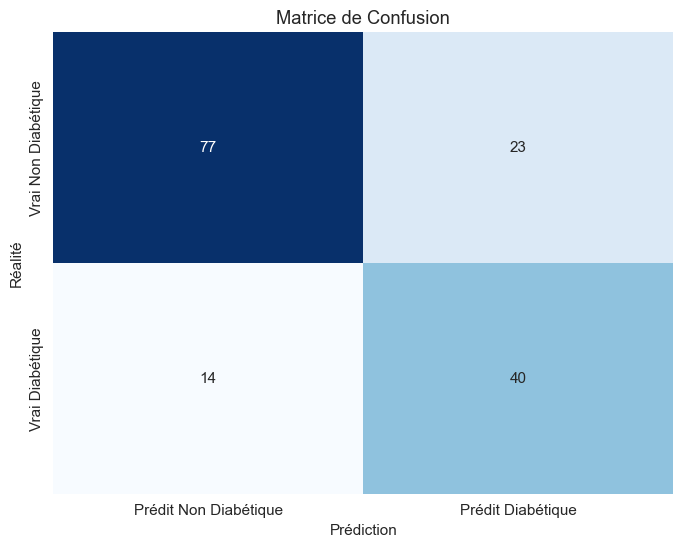


Rapport de Classification (Détail des Métriques) :
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



In [529]:
# Prédiction avec le meilleur modèle
y_pred_final = best_gb_model.predict(X_test)

print("\n--- Évaluation Finale du Modèle Gradient Boosting Optimisé ---")

# Matrice de Confusion
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédit Non Diabétique', 'Prédit Diabétique'],
            yticklabels=['Vrai Non Diabétique', 'Vrai Diabétique'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()

# Rapport de Classification (Détaillé)
print("\nRapport de Classification (Détail des Métriques) :")
print(classification_report(y_test, y_pred_final, zero_division=0))

**Conclusion Générale de la Matrice de Confusion :**

1.  **Le Succès du Rappel (Recall)** : Avec un score de **0.74** pour la classe Diabétique (1), le modèle détecte correctement **74%** des cas positifs réels. Cela signifie que le risque de **Faux Négatifs (diagnostics manqués)**, l'erreur la plus coûteuse dans le domaine médical, est faible.

2.  **Le Compromis de la Précision (Precision)** : Le modèle a une **Précision de 0.63** pour la classe 1. Ce score indique qu'environ un tiers des diagnostics positifs sont des **Faux Positifs** ("fausses alertes"). Ce compromis est considéré comme **acceptable et souhaitable** en dépistage : il est préférable d'envoyer un patient sain faire des tests supplémentaires (FP) plutôt que de renvoyer un patient diabétique chez lui sans traitement (FN).

**Interprétation Clinique :**

Le modèle optimisé est un outil **efficace et éthiquement responsable** pour le pré-dépistage, car il privilégie la **sécurité du patient** en maximisant la détection des cas réels de diabète.